In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import glob

In [ ]:
dataframes = []
labels = []

# Adjust this path and filenames as needed
for file in glob.glob("data/*.csv"):
    df = pd.read_csv(file)
    # Use the column names (excluding 'Wavelength') as sample labels
    sample_label = [col for col in df.columns if col != 'Wavelength']
    
    # transpose to make rows = samples, columns = wavelengths
    df_samples = df.drop(columns='Wavelength').T
    df_samples.columns = df['Wavelength']
    
    dataframes.append(df_samples)
    labels.extend([sample_label] * df_samples.shape[0])

[['All-Purpose Flour', 'Almond Flour', 'Bread Flour', 'Cake Flour', 'Cashew Milk Powder', 'Chickpea Flour', 'Coconut Milk Powder', 'Cornstarch', 'Gluten-Free Flour Blend', 'Goat Milk Powder', 'Non-Fat Milk Powder', 'Rice Flour', 'Soy Milk Powder', 'Tapioca Flour', 'Whole Milk Powder', 'Whole Wheat Flour', 'Unknown Powder'], ['All-Purpose Flour', 'Almond Flour', 'Bread Flour', 'Cake Flour', 'Cashew Milk Powder', 'Chickpea Flour', 'Coconut Milk Powder', 'Cornstarch', 'Gluten-Free Flour Blend', 'Goat Milk Powder', 'Non-Fat Milk Powder', 'Rice Flour', 'Soy Milk Powder', 'Tapioca Flour', 'Whole Milk Powder', 'Whole Wheat Flour', 'Unknown Powder'], ['All-Purpose Flour', 'Almond Flour', 'Bread Flour', 'Cake Flour', 'Cashew Milk Powder', 'Chickpea Flour', 'Coconut Milk Powder', 'Cornstarch', 'Gluten-Free Flour Blend', 'Goat Milk Powder', 'Non-Fat Milk Powder', 'Rice Flour', 'Soy Milk Powder', 'Tapioca Flour', 'Whole Milk Powder', 'Whole Wheat Flour', 'Unknown Powder'], ['All-Purpose Flour', 'A

In [21]:
# Combine all samples into one DataFrame
X = pd.concat(dataframes)
y = np.unique(np.array(labels))

In [23]:
print(f"Shape of X: {X.shape}")
print(f"Example labels: {y}")

Shape of X: (17, 9)
Example labels: ['All-Purpose Flour' 'Almond Flour' 'Bread Flour' 'Cake Flour'
 'Cashew Milk Powder' 'Chickpea Flour' 'Coconut Milk Powder' 'Cornstarch'
 'Gluten-Free Flour Blend' 'Goat Milk Powder' 'Non-Fat Milk Powder'
 'Rice Flour' 'Soy Milk Powder' 'Tapioca Flour' 'Unknown Powder'
 'Whole Milk Powder' 'Whole Wheat Flour']


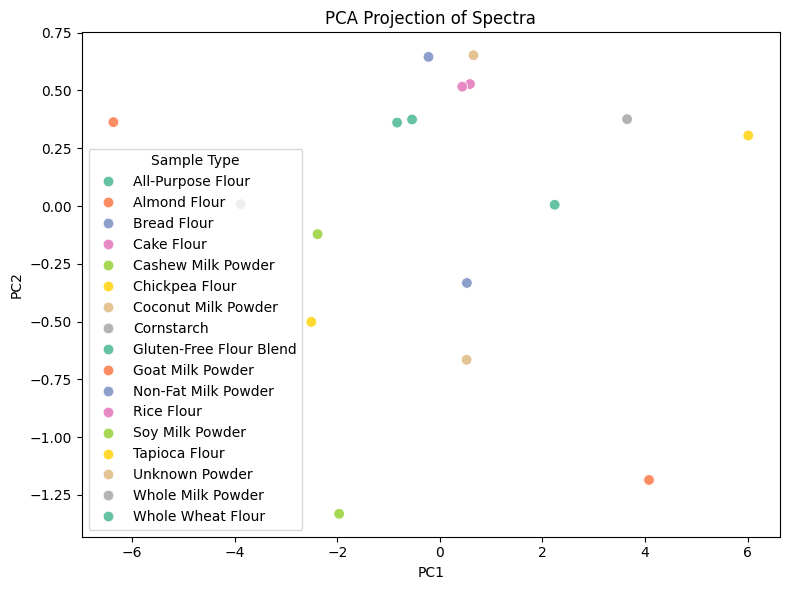

In [18]:
# 🔍 Step 2: Preprocess the Data
# Standardize features (important for distance-based models like KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# 🎨 Step 3: Visualize Using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set2", s=60)
plt.title("PCA Projection of Spectra")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Sample Type")
plt.tight_layout()
plt.show()

In [19]:
# 🧠 Step 4: Train a K-Nearest Neighbors Classifier
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Accuracy: 0.00


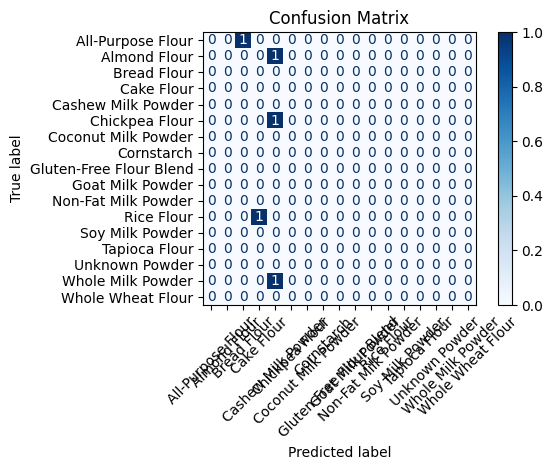

In [20]:
# 📊 Step 5: Evaluate the Model
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()